# MODIS-Aqua Satellite Tutorial
---

This notebook walks through plotting data from the NASA MODIS-Aqua Satellite. Data can be downloaded here: https://neo.sci.gsfc.nasa.gov/view.php?datasetId=MY1DMM_CHLORA&date=2019-02-01 and more information about the satellite can be found here: https://oceancolor.gsfc.nasa.gov/data/aqua/.

In [1]:
# Imports
import netCDF4                        # pip install netCDF4
import xarray as xr                   # pip install xarray
import cmocean                        # pip install cmocean
import os
import numpy as np
import matplotlib.pyplot as plt

Point Python to the folder containing your data. Ideally, it's in the same directory as this Jupyter notebook.

In [2]:
parent_dir = os.getcwd()
file_path = os.path.join(parent_dir, 'data')

output_dir = os.path.join(parent_dir, 'visualizations')
try:
    os.mkdir(output_dir)
except OSError as error:
    print('Folder for visualization output exists.')

files = [item for item in os.listdir(file_path) if not item.startswith('.')]

Folder for visualization output exists.


Make sure we got the right files:

In [3]:
files

['A20190012019031.L3m_MO_CHL_chlor_a_4km.nc',
 'A20190322019059.L3m_MO_CHL_chlor_a_4km.nc',
 'A20190602019090.L3m_MO_CHL_chlor_a_4km.nc',
 'A20190912019120.L3m_MO_CHL_chlor_a_4km.nc',
 'A20191212019151.L3m_MO_CHL_chlor_a_4km.nc',
 'A20191522019181.L3m_MO_CHL_chlor_a_4km.nc',
 'A20191822019212.L3m_MO_CHL_chlor_a_4km.nc',
 'A20192132019243.L3m_MO_CHL_chlor_a_4km.nc',
 'A20192442019273.L3m_MO_CHL_chlor_a_4km.nc',
 'A20192742019304.L3m_MO_CHL_chlor_a_4km.nc',
 'A20193052019334.L3m_MO_CHL_chlor_a_4km.nc',
 'A20193352019365.L3m_MO_CHL_chlor_a_4km.nc']

Open these files with xarray:

In [4]:
datasets = [xr.open_dataset('./data/' + file) for file in files]

In order to make some plots, we need to find the name of the variable we're interested in. xarray has a handy .data_vars method that prints out all of the variables available to you. You can also use .attrs to get some metadata information. For now, let's look for the name of our chlorophyll variable. 

In [5]:
datasets[0].data_vars

Data variables:
    chlor_a  (lat, lon) float32 ...
    palette  (rgb, eightbitcolor) uint8 ...

Now that we know our variable of interest is called `chlor_a`, we can make our first map! Doing a simply .plot() will give us a plot of the entire globe. Let's also use the cmocean's algae option, it's nice to match our color palettes to the data we're plotting. 

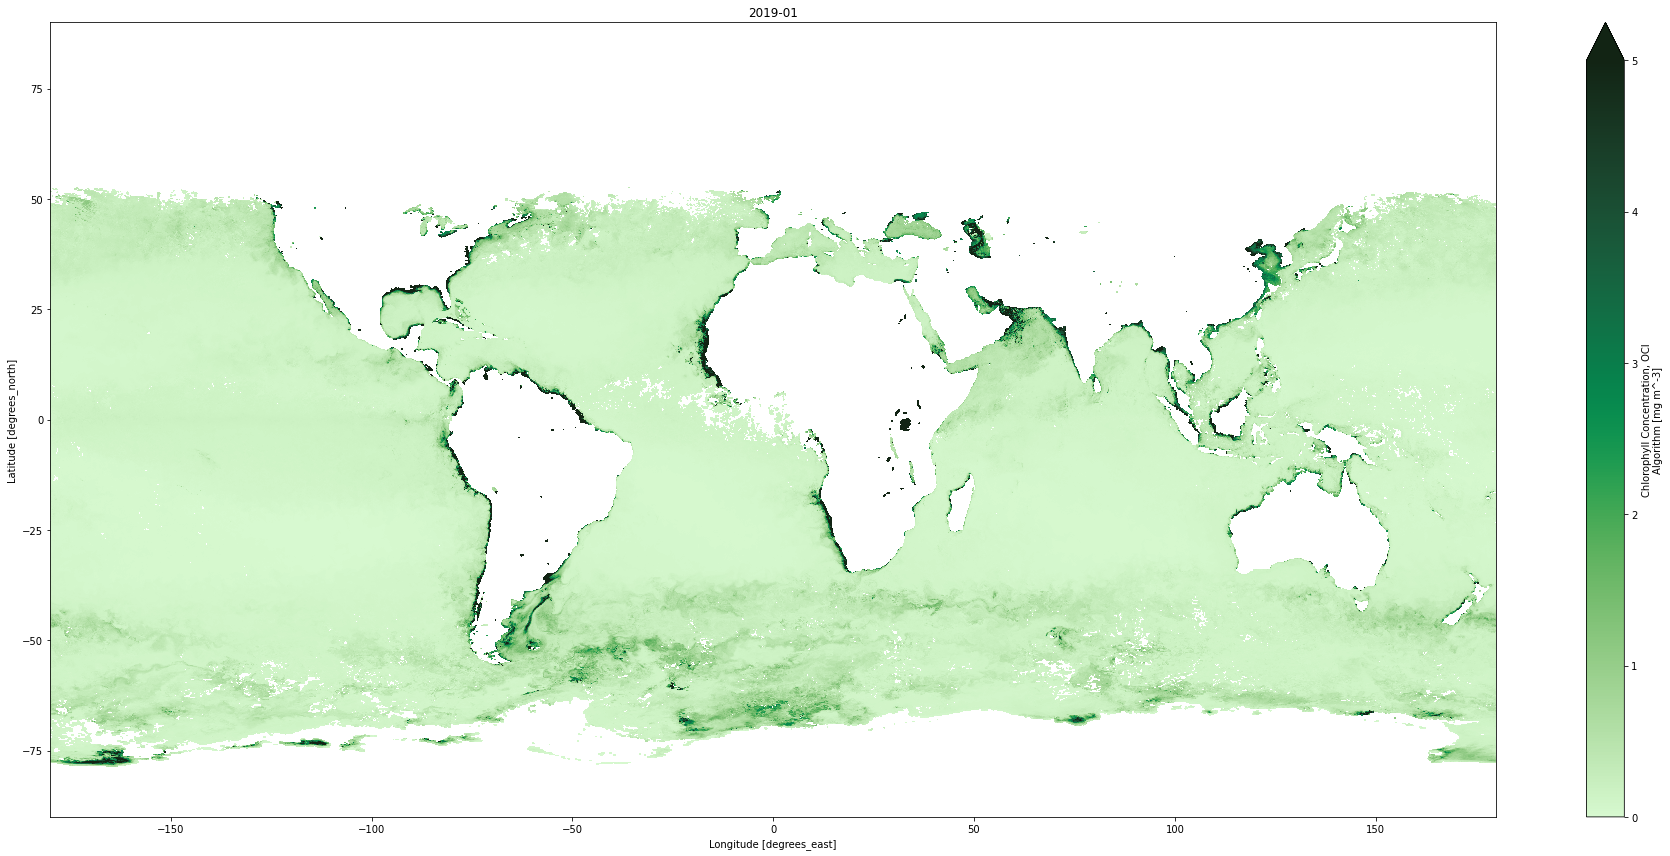

In [6]:
datasets[0].chlor_a.plot(x='lon', y='lat', figsize=(26,12), vmin=0, vmax=5, cmap=cmocean.cm.algae);
plt.title(datasets[0].attrs['time_coverage_start'][:7])
plt.tight_layout()
plt.savefig('./visualizations/global_snapshot.png')

Now we can make a plot zoomed in on the Gulf of California using just 1 dataset.

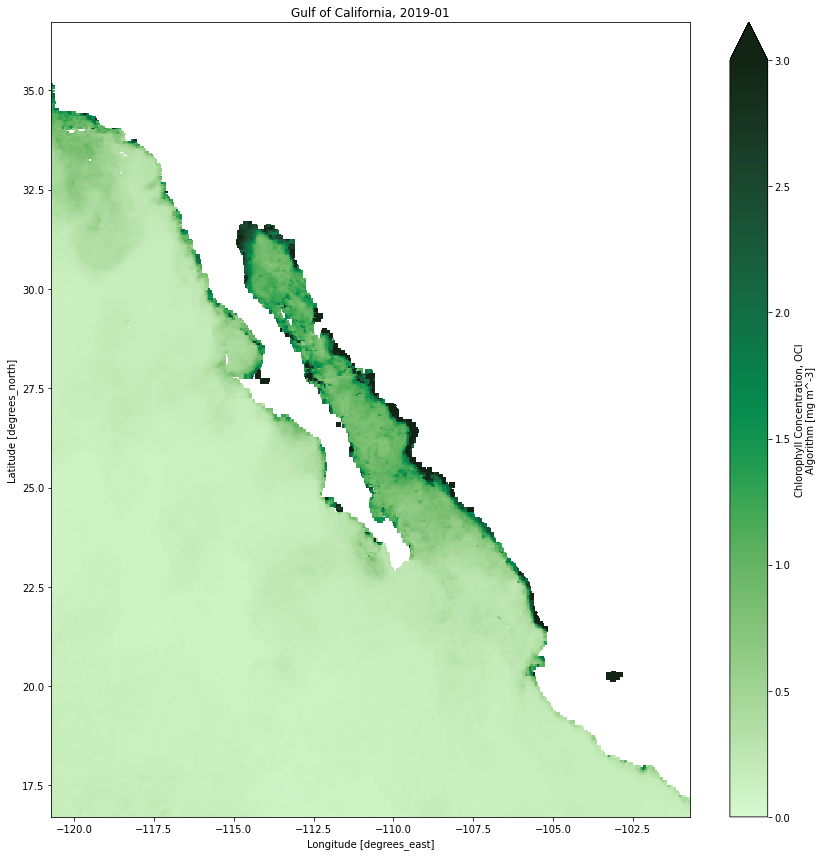

In [7]:
site_lat = 26.7
site_lon = -110.7

ds_slice = datasets[0].sel(lat=slice(site_lat+10, site_lat-10), lon=slice(site_lon-10, site_lon+10))

ds_slice.chlor_a.plot(x='lon', y='lat', figsize=(12,12), vmin=0, vmax=3, cmap=cmocean.cm.algae);

plt.title('Gulf of California, ' + datasets[0].attrs['time_coverage_start'][:7])
plt.tight_layout()
plt.savefig('./visualizations/gulf_of_california.png')

Now let's plot all 12 months of the year at this location and see how chlorophyll levels change throughout the year 2019.

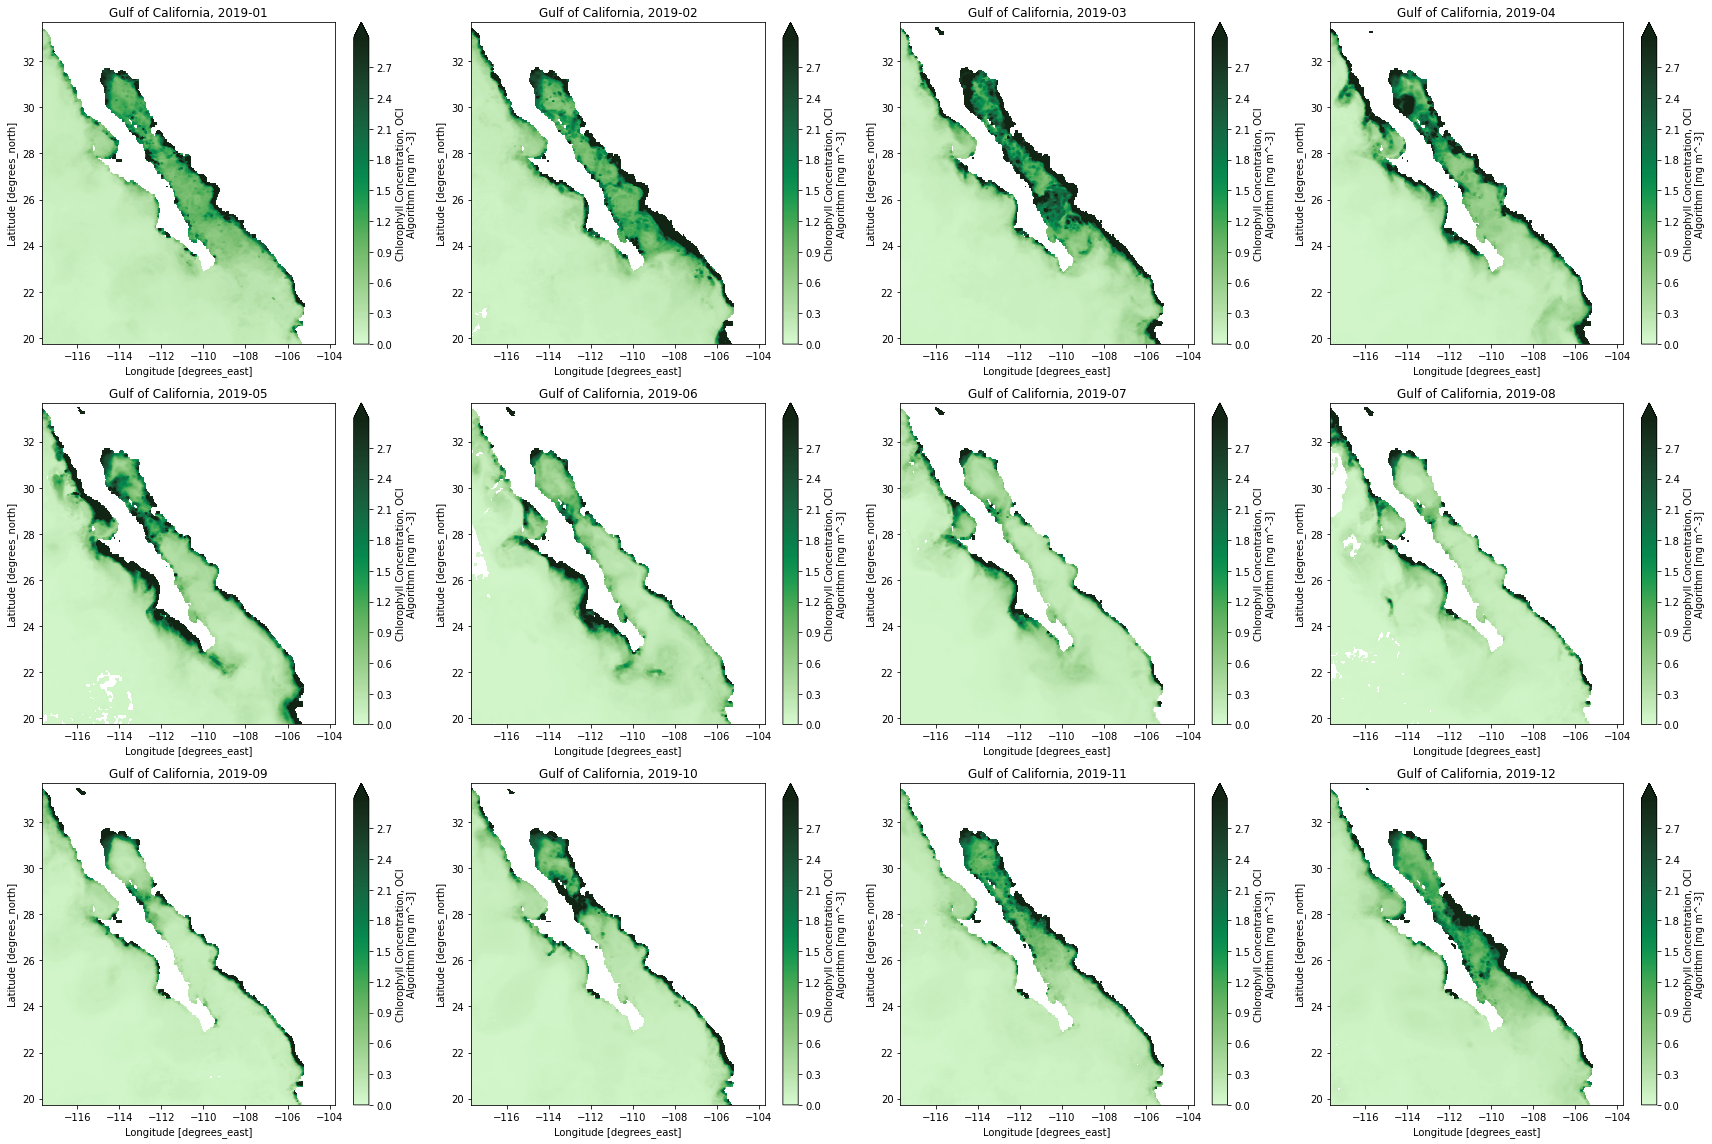

In [8]:
# Set colorbar values. May take trial and error to get the level of detail you are aiming for.
vmin = 0.0
vmax = 3.0

# Set the lat/lon distance from site location to plot 
box_lim = 7

# Set levels for resolution of colorbar. Change the 0.01 value for higher or lower resolution. 
lvl = np.arange(vmin, vmax, 0.01).tolist()

# Create a grid of subplots, 3 rows x 4 columns
f, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) = plt.subplots(3, 4, figsize=(24,16))
ax_list = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12]

# Loop through the subplot axes
for i in range(len(ax_list)):
    ds = datasets[i]
    
    # Slice the data using previous coordinates
    ds_slice = ds.sel(lat=slice(site_lat+box_lim, site_lat-box_lim), lon=slice(site_lon-box_lim, site_lon+box_lim))
    
    # Generate plot and title
    ds_slice.chlor_a.plot.contourf(x='lon', y='lat', ax=ax_list[i], vmin=vmin, vmax=vmax, levels=lvl, cmap=cmocean.cm.algae)
    ax_list[i].set_title('Gulf of California, ' + ds.attrs['time_coverage_start'][:7])
    
plt.tight_layout()
plt.savefig('./visualizations/gulf_of_california_all.png')

I also wanted to look at the mouth of a river, because river outflows can carry phytoplankton and nutrients out to sea. Fun to look at, with strong seasonality, but I had trouble finding a river with minimal cloud cover. It's a lot of trial and error, I tested out the Columbia, the Rio Grande, and the Amazon, but wasn't completely satisfied with any of them. The Amazon is plotted below, view it at your leisure! 

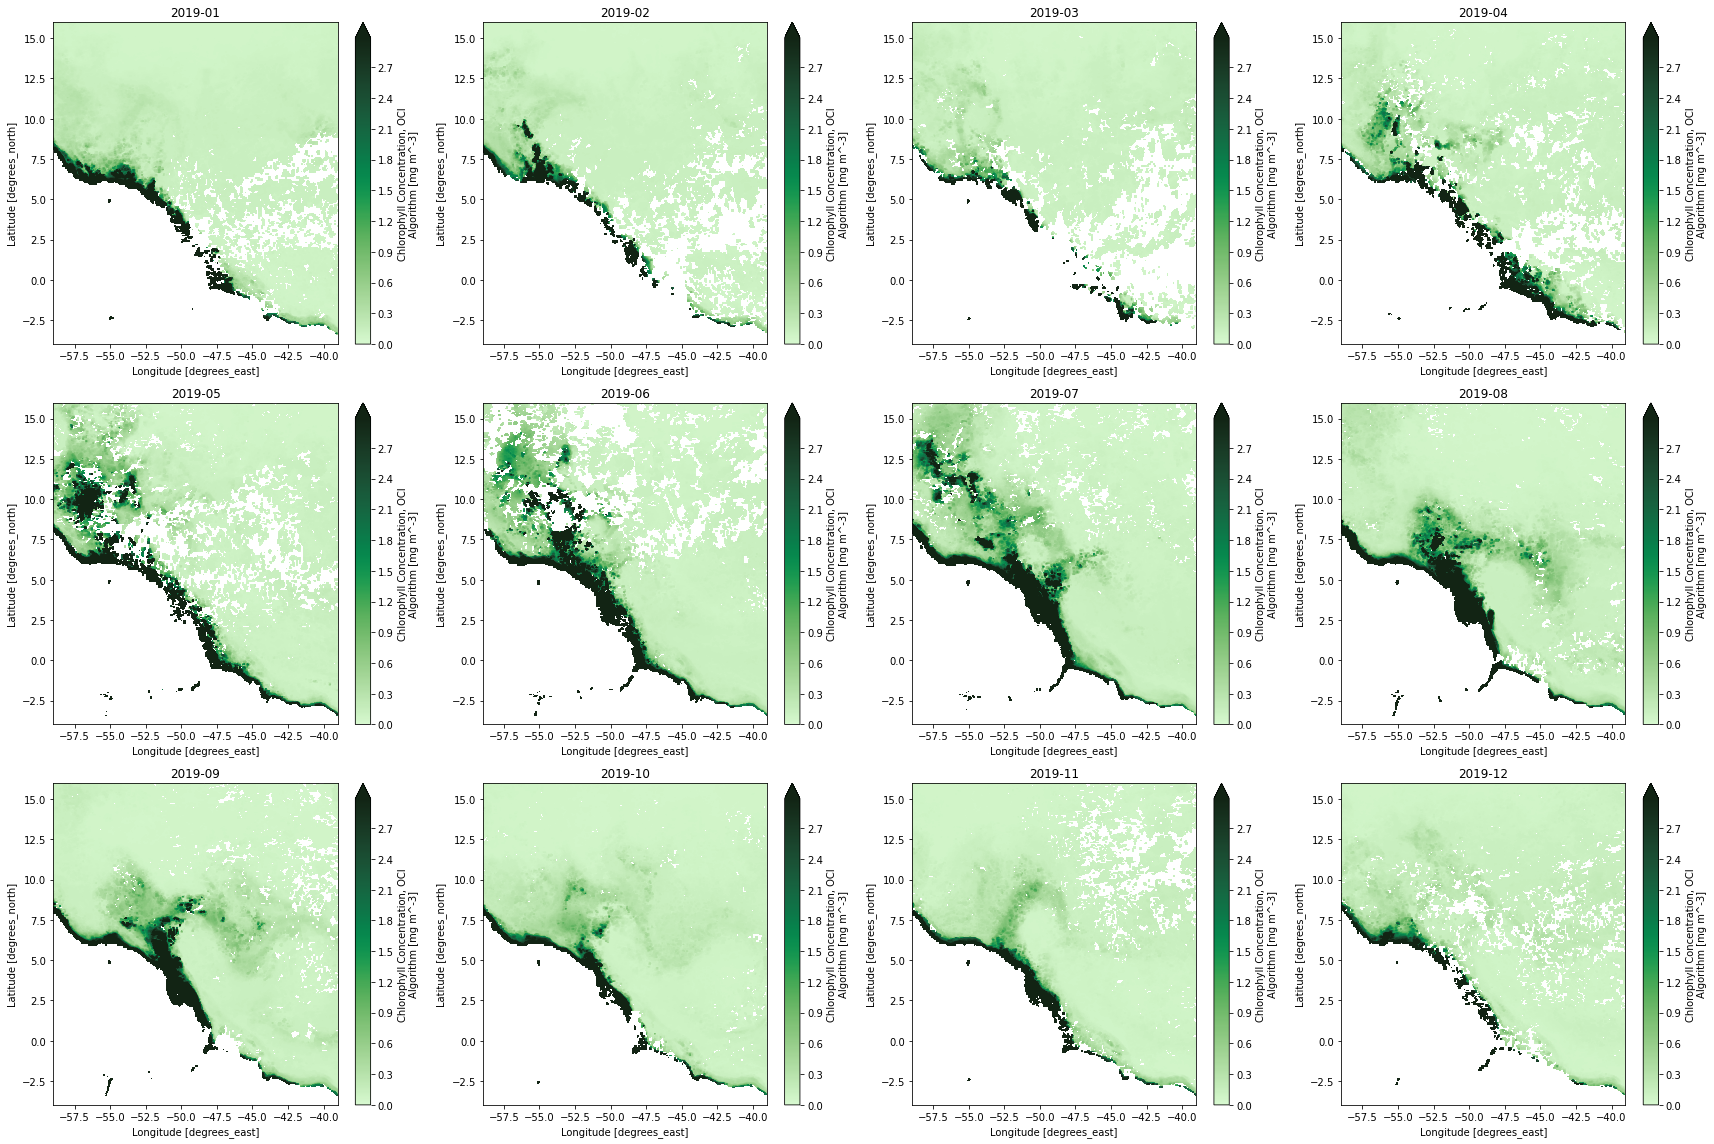

In [9]:
# Set colorbar values. May take trial and error to get the level of detail you are aiming for.
vmin = 0.0
vmax = 3.0

box_lim = 10
site_lat = 6
site_lon = -49

# Set levels for resolution of colorbar. Change the 0.01 value for higher or lower resolution. 
lvl = np.arange(vmin, vmax, 0.01).tolist()

f, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) = plt.subplots(3, 4, figsize=(24,16))

ax_list = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12]

for i in range(len(ax_list)):
    ds = datasets[i]
    ds_slice = ds.sel(lat=slice(site_lat+box_lim, site_lat-box_lim), lon=slice(site_lon-box_lim, site_lon+box_lim))    # Select location
    ds_slice.chlor_a.plot.contourf(x='lon', y='lat', ax=ax_list[i], vmin=vmin, vmax=vmax, levels=lvl, cmap=cmocean.cm.algae)
    ax_list[i].set_title(ds.attrs['time_coverage_start'][:7])
    
plt.tight_layout()
plt.savefig('./visualizations/river_all.png')

Thanks for viewing! You can read the blog post where I used these visualizations [here](https://oceandatascience.medium.com/mapping-sea-surface-chlorophyll-in-python-35bf1e8a7eeb).